In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
from scipy.stats import randint
seed = 330
np.random.seed(seed)

In [542]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [543]:
import lightgbm as lgbm

In [544]:
pwd

'/Users/mattpucci/Desktop'

In [545]:
cd /Users/mattpucci/Desktop

/Users/mattpucci/Desktop


In [546]:
ls

2012-18_officialBoxScore.csv
2016-17_officialBoxScore.csv
2016-17_playerBoxScore.csv
2016-17_standings.csv
2016-17_teamBoxScore.csv
2017-18_officialBoxScore.csv
2017-18_playerBoxScore.csv
2017-18_standings.csv
2017-18_teamBoxScore.csv
Cover Letter.pdf
RCdata/
Restaurant Project Data/
Screen Shot 2020-04-08 at 11.07.10 AM.png
Screen Shot 2020-04-08 at 8.03.30 PM.png
Screen Shot 2020-04-20 at 9.04.32 AM.png
Screen Shot 2020-04-20 at 9.04.42 AM.png
UI Online - Doc_20200409083848.pdf
all_seasons.csv
eight.csv
five.csv
four.csv
nine.csv
one.csv
seven.csv
six.csv
teamBoxScore.csv
three.csv
two.csv
untitled folder/
~$ver Letter.docx


# Let's take an exploratory look at the NBA 2016-2017 team box score dataset and do some Preprocessing. 

In [634]:
df= pd.read_csv('2016-17_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [636]:
df_test = pd.read_csv('2017-18_teamBoxScore.csv')
df_test.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123


In [637]:
df_copy = df.copy()

In [638]:
date_value = pd.to_datetime(df['gmDate'], errors='coerce')
time_value = pd.to_datetime(df['gmTime'], errors='coerce')


df['year'] = date_value.dt.year 
df['month'] = date_value.dt.month 
df['day'] = date_value.dt.day 
df['hour'] = time_value.dt.hour 
df['minute'] = time_value.dt.minute

del df['gmDate']
del df['gmTime']

In [639]:
date_value = pd.to_datetime(df_test['gmDate'], errors='coerce')
time_value = pd.to_datetime(df_test['gmTime'], errors='coerce')


df_test['year'] = date_value.dt.year 
df_test['month'] = date_value.dt.month 
df_test['day'] = date_value.dt.day 
df_test['hour'] = time_value.dt.hour 
df_test['minute'] = time_value.dt.minute

del df_test['gmDate']
del df_test['gmTime']

In [641]:
missing_data = [col for col in df.columns if df[col].isnull().any()] 
df.drop(missing_data, axis=1, inplace=True)
df_test.drop(missing_data, axis=1, inplace=True)

In [643]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(df[col])
    
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    df[col] = indexer[col].get_indexer(df[col])

In [644]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_test.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if df_test[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(df_test[col])
    
for col in categorical_columns:
    if df_test[col].dtype in numerics: continue
    df_test[col] = indexer[col].get_indexer(df_test[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96155f0dd0>,
      dtype=object)

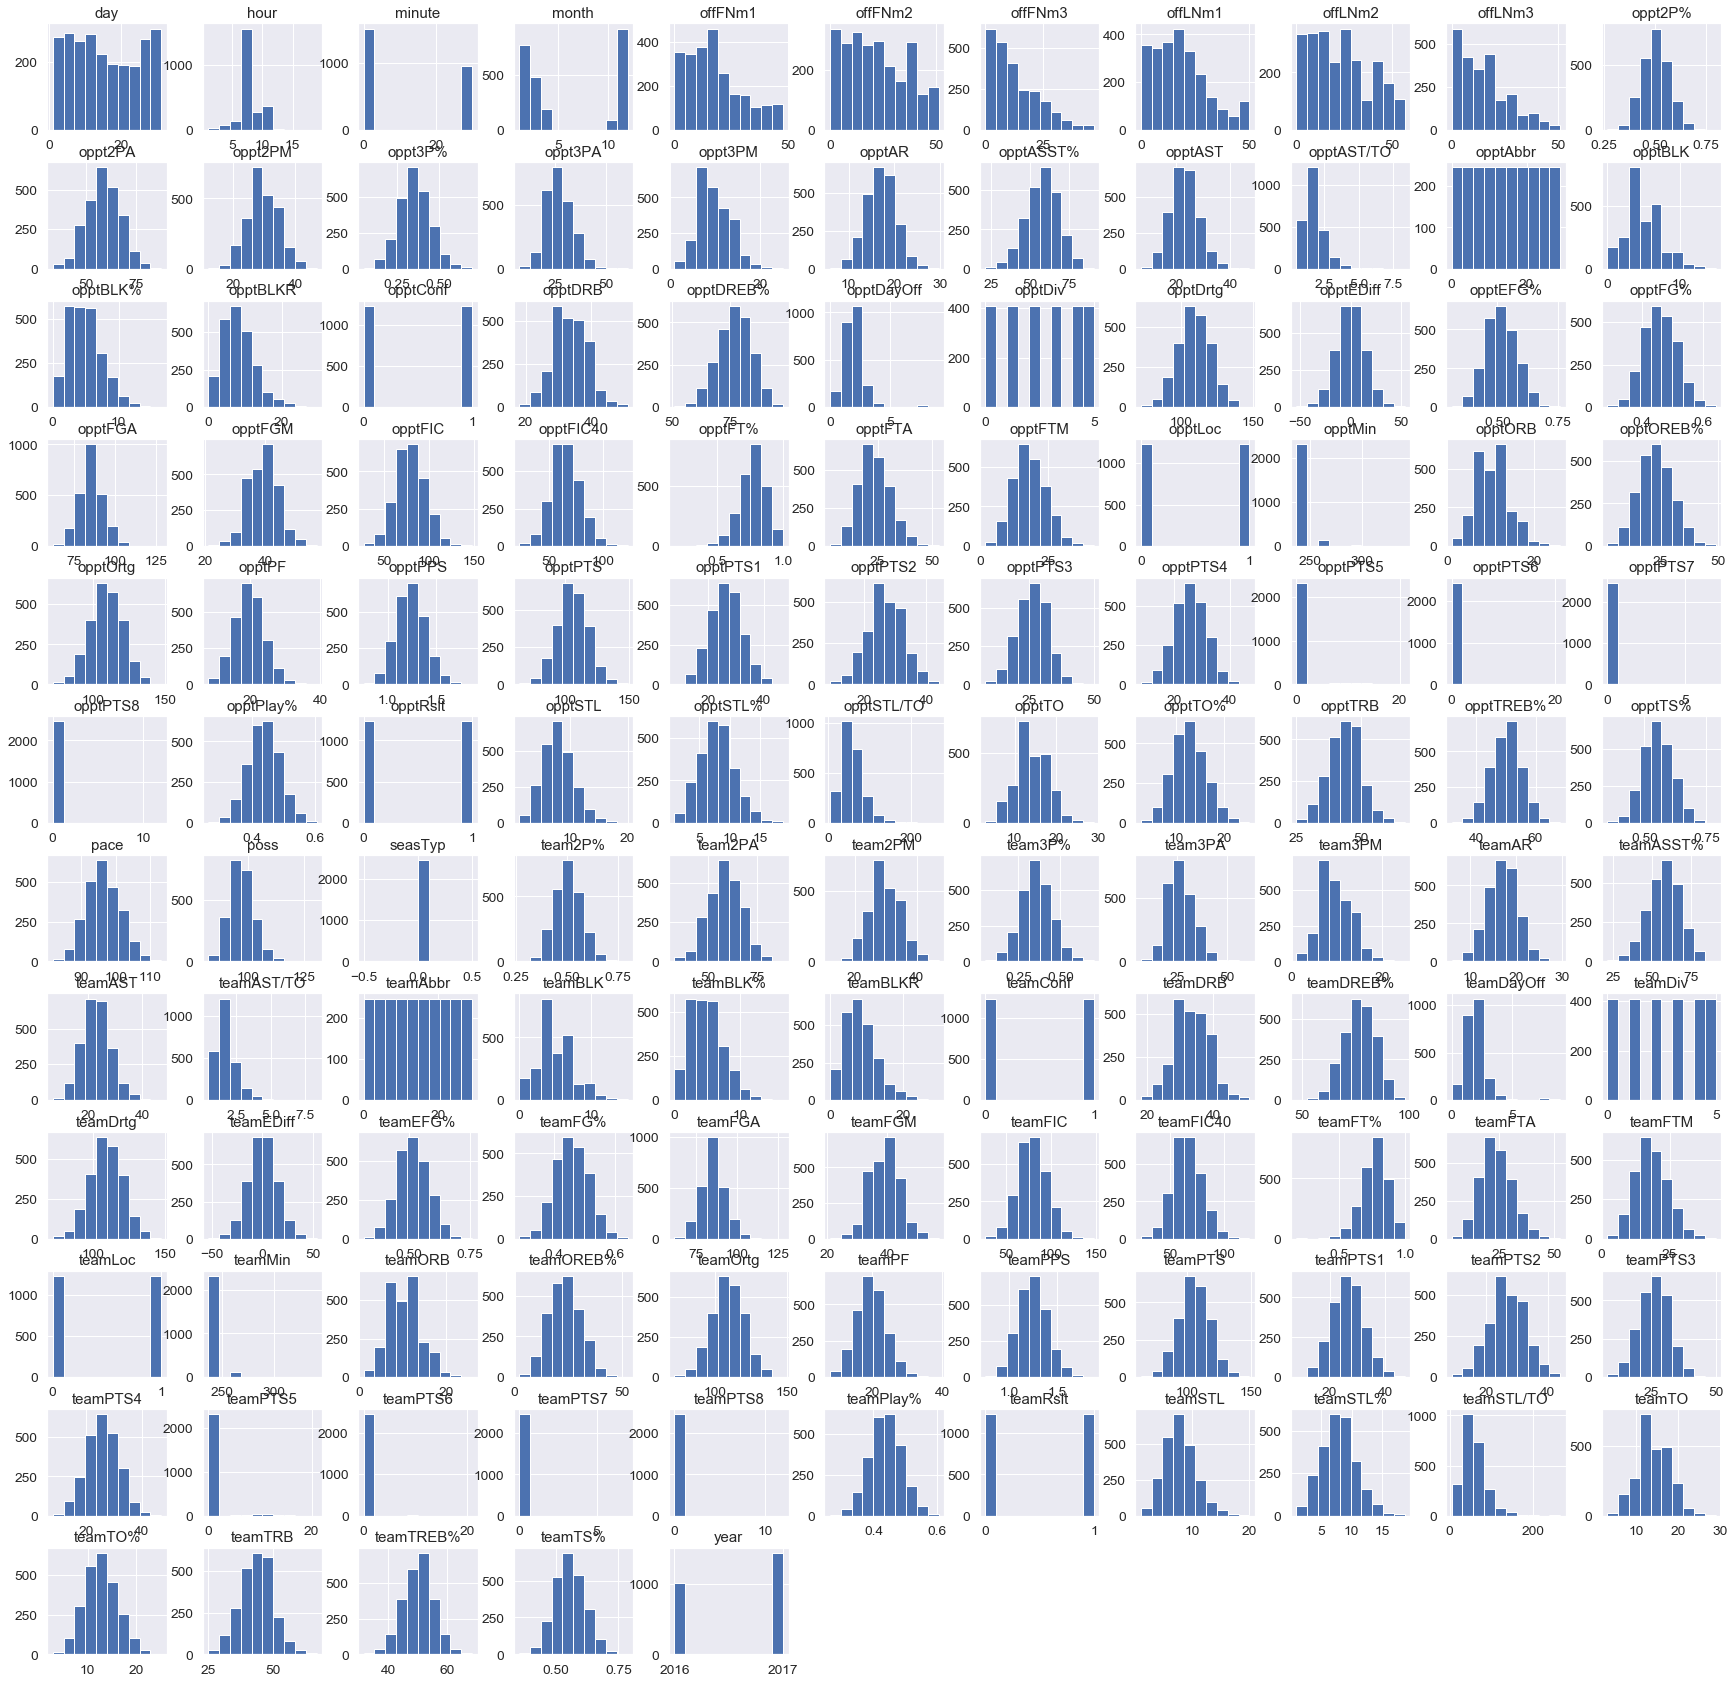

In [647]:
df.hist(figsize=(30,30))

## Not all of the data looks standardly distributed.  Let's now check and see if there are any strong correlations.

Text(0.5, 1, 'Figure 1: Seaborn Data Correlation Heat Map')

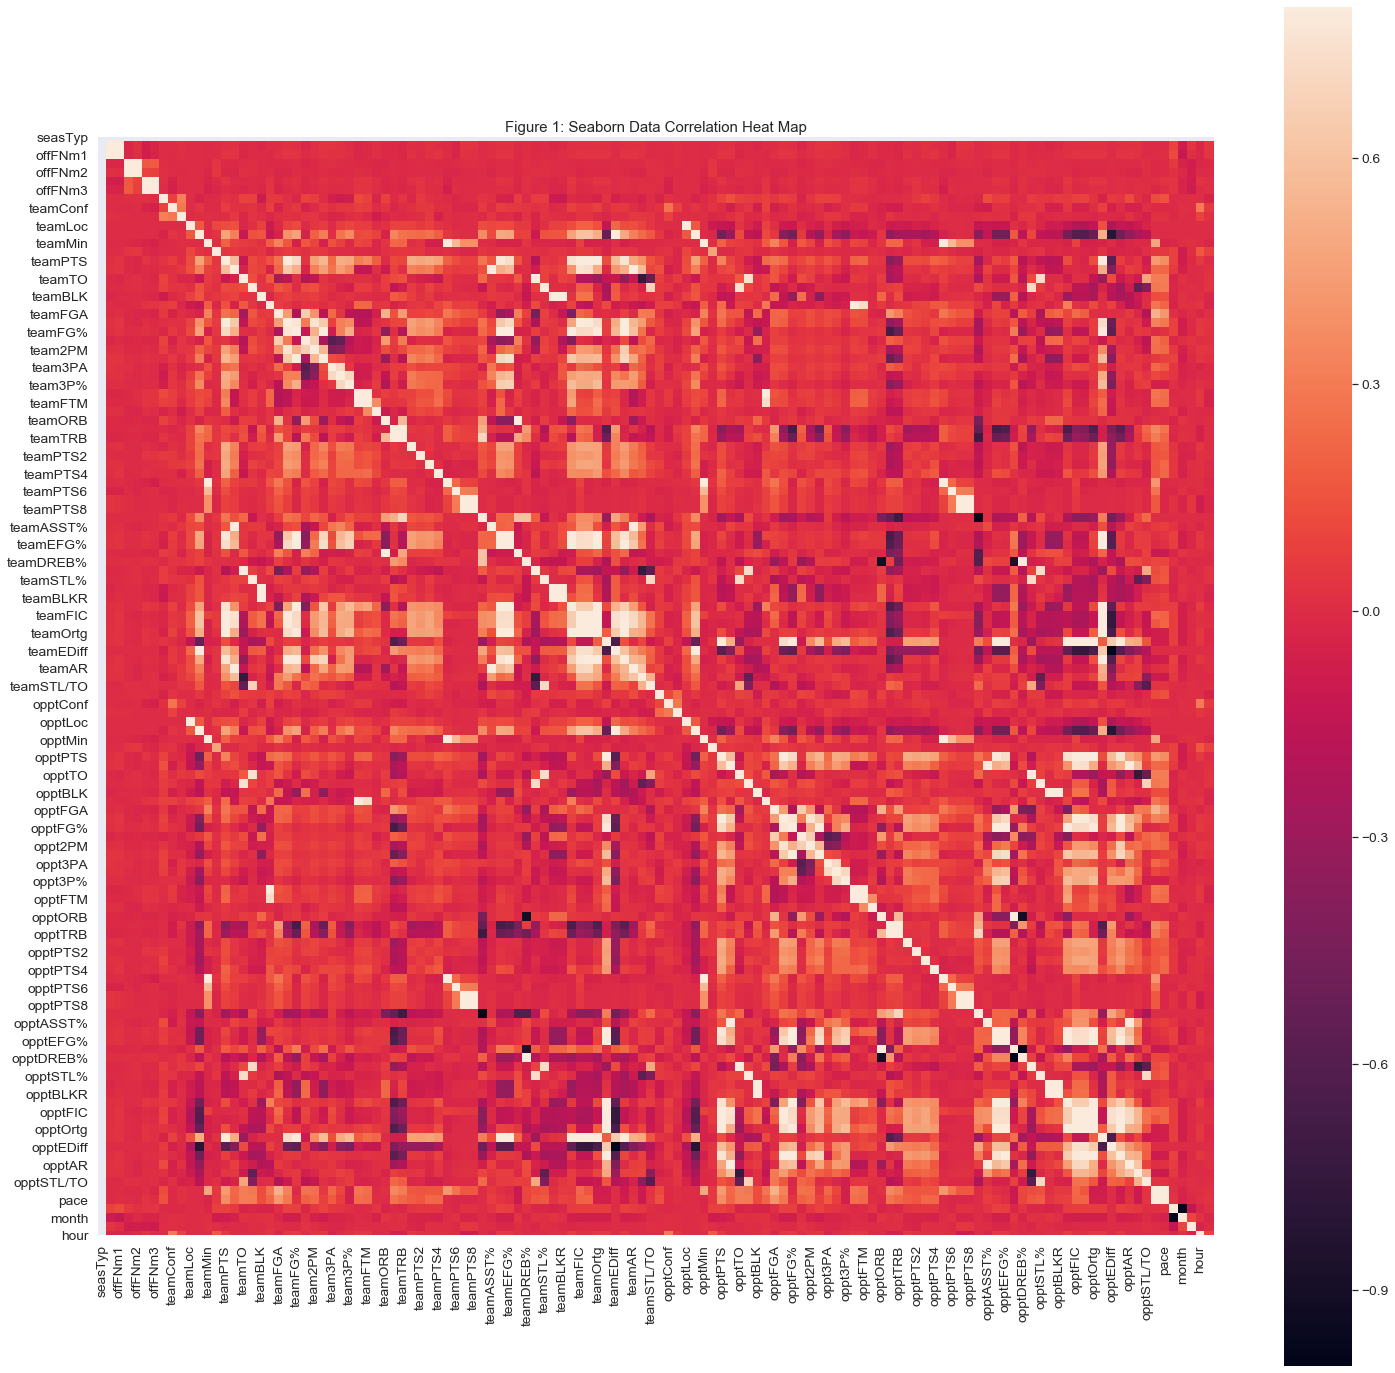

In [648]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_corr, vmax=.8, square=True).set_title('Figure 1: Seaborn Data Correlation Heat Map') 

### There is far too much going on in the above visual to make good sense of it.  Let's take a look at the 10 highest correlated features with more clarity.  

In [649]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [650]:
df.teamRslt.value_counts()

1    1230
0    1230
Name: teamRslt, dtype: int64

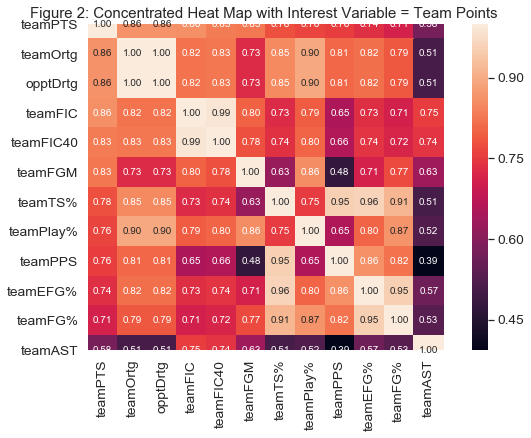

<Figure size 1800x1800 with 0 Axes>

In [651]:
k = 12
cols = df_corr.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Points ")
plt.figure(figsize=(25,25))
plt.show()

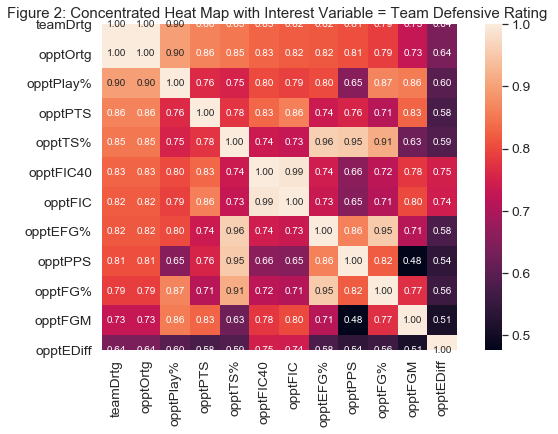

<Figure size 1800x1800 with 0 Axes>

In [652]:
k = 12
cols = df_corr.nlargest(k, 'teamDrtg')['teamDrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Defensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

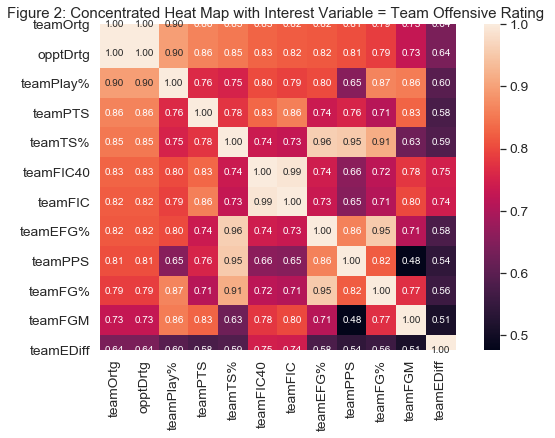

<Figure size 1800x1800 with 0 Axes>

In [653]:
k = 12
cols = df_corr.nlargest(k, 'teamOrtg')['teamOrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Offensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

In [654]:
y = df['teamRslt']

drop = ['teamRslt', 'opptRslt', 'teamEDiff', 'teamFIC', 'opptEDiff', 'opptFIC']

df.drop(drop, axis=1, inplace=True)

x = df;

In [655]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [656]:
feature_columns = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM',]
x = x[feature_columns];

X.head()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,0,0,0,0,0,0,0,0,0,0,...,20.8951,2.0667,80.0000,100.3729,100.3729,2016,10,25,8,0
1,0,0,0,0,0,0,0,1,0,1,...,12.9969,0.9444,33.3333,100.3729,99.9564,2016,10,25,8,0
2,0,1,1,1,1,1,1,2,1,2,...,18.3824,1.6923,38.4615,92.5380,92.1540,2016,10,25,10,0
3,0,1,1,1,1,1,1,3,1,2,...,15.5687,1.3571,64.2857,92.5380,92.9252,2016,10,25,10,0
4,0,2,2,2,2,2,2,4,1,3,...,18.0560,1.5000,68.7500,98.7765,98.7765,2016,10,25,10,30


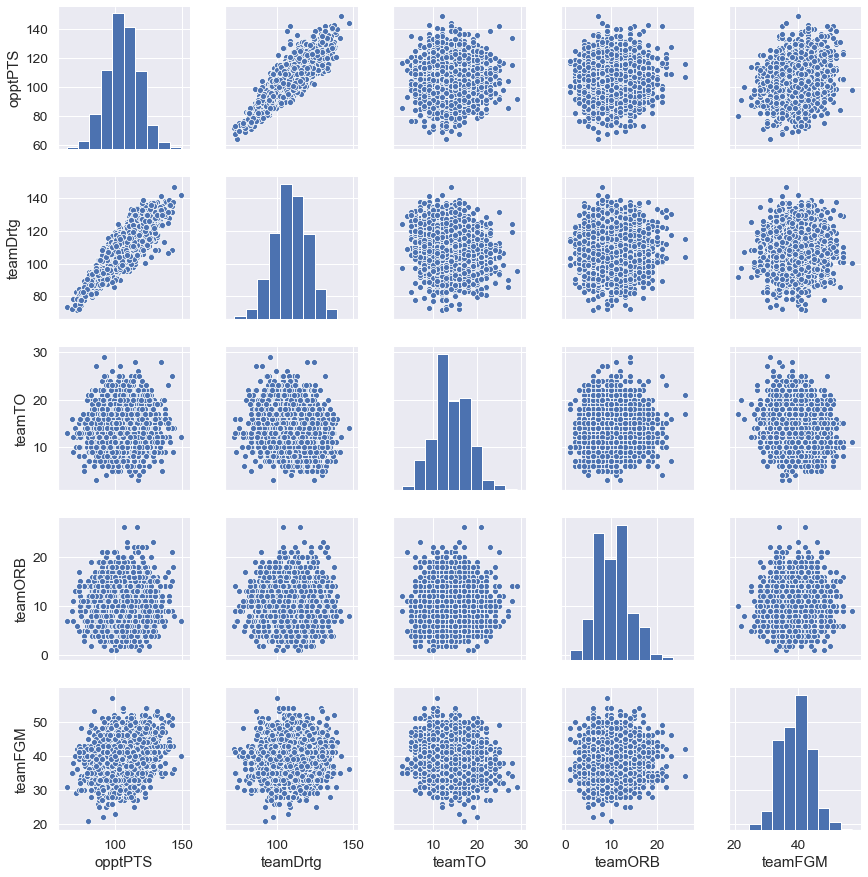

In [657]:
feature_columns = ['opptPTS', 'teamDrtg', 'teamTO', 'teamORB', 'teamFGM']
sns.pairplot(df[feature_columns], height=2.5)
plt.show()

In [658]:
def parseResult(data):
    def parse(n): 
        left = n[0] 
        rigth = n[1]
        return 1 if left > rigth else 2
    
    return list(map(parse, data))

In [659]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [660]:
from sklearn.metrics import accuracy_score

In [661]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
results = []
result = accuracy_score(y_test, pred)
results.append(result)
print(result)

0.8130081300813008


In [662]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [663]:
pred = randomforest.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.8211382113821138


In [664]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                    max_depth=1, random_state=0).fit(x_train, y_train)

result = gradient_boost.score(x_test, y_test)
results.append(result)
print(result)

0.8414634146341463


In [665]:
df_test.head()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Forte,Brian,Smith,Michael,BOS,East,Atlantic,Away,Loss,...,14.6154,1.1176,17.6471,100.2809,99.8648,2017,10,17,8,0
1,Regular,Forte,Brian,Smith,Michael,CLE,East,Central,Home,Win,...,17.7778,2.0000,91.6667,100.2809,100.2809,2017,10,17,8,0
2,Regular,Maddox,Tre,Garretson,Ron,HOU,West,Southwest,Away,Win,...,24.2442,2.0000,29.4118,102.5117,102.9406,2017,10,17,10,30
3,Regular,Maddox,Tre,Garretson,Ron,GS,West,Pacific,Home,Loss,...,19.1309,2.1538,69.2308,102.5117,102.0863,2017,10,17,10,30
4,Regular,Davis,Marc,Boland,Matt,CHA,East,Southeast,Away,Loss,...,17.8731,2.6667,155.5556,98.9805,99.8123,2017,10,18,7,0


In [666]:
x_new = df_test[feature_columns]
y_new = df_test['teamRslt']
x_new.head()

,opptPTS,teamDrtg,teamTO,teamORB,teamFGM
0,102,101.7143,12,9,36
1,99,98.7227,17,9,38
2,121,118.0353,13,10,47
3,122,119.0108,17,6,43
4,102,103.0506,17,3,29


In [669]:
df_test.dropna()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
0,Regular,Forte,Brian,Smith,Michael,BOS,East,Atlantic,Away,Loss,...,14.6154,1.1176,17.6471,100.2809,99.8648,2017,10,17,8,0
1,Regular,Forte,Brian,Smith,Michael,CLE,East,Central,Home,Win,...,17.7778,2.0000,91.6667,100.2809,100.2809,2017,10,17,8,0
2,Regular,Maddox,Tre,Garretson,Ron,HOU,West,Southwest,Away,Win,...,24.2442,2.0000,29.4118,102.5117,102.9406,2017,10,17,10,30
3,Regular,Maddox,Tre,Garretson,Ron,GS,West,Pacific,Home,Loss,...,19.1309,2.1538,69.2308,102.5117,102.0863,2017,10,17,10,30
4,Regular,Davis,Marc,Boland,Matt,CHA,East,Southeast,Away,Loss,...,17.8731,2.6667,155.5556,98.9805,99.8123,2017,10,18,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Regular,Garretson,Ron,Mott,Rodney,LAC,West,Pacific,Home,Loss,...,18.2428,1.4706,47.0588,101.7513,101.7513,2018,4,11,10,30
2456,Regular,Cutler,Kevin,Kennedy,Bill,UTA,West,Northwest,Away,Loss,...,15.1951,1.9000,90.0000,97.6761,97.2708,2018,4,11,10,30
2457,Regular,Cutler,Kevin,Kennedy,Bill,POR,West,Northwest,Home,Win,...,13.5788,1.2000,33.3333,97.6761,97.6761,2018,4,11,10,30
2458,Regular,Tiven,Josh,Orr,J.T.,HOU,West,Southwest,Away,Loss,...,18.0624,2.0000,54.5455,91.9864,91.6047,2018,4,11,10,30


In [671]:
gradient2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_new, y_new)
gradient2.score(x_new, y_new)

0.866260162601626

In [674]:
matches = [
    {'home_team': 'MIN', 'away_team': 'BOS'},
    {'home_team': 'CLE', 'away_team': 'LAL'},
    {'home_team': 'CHA', 'away_team': 'MIN'},
    {'home_team': 'ORL', 'away_team': 'HOU'},
    {'home_team': 'DET', 'away_team': 'UTA'},
]

for match in matches:
    home_team = match['home_team']    
    away_team = match['away_team']

    prev_matches = df_copy.loc[(df_copy['teamAbbr'] == home_team) & (df_copy['opptAbbr'] == away_team)][feature_columns]
    avg = prev_matches.mean()

    avg_prev = [prev_matches.mean().values.tolist()]

    pred = gradient2.predict(avg_prev)
    prob = gradient2.predict_proba(avg_prev)

    print(home_team + ' vs ' + away_team)
    print(pred)
    print(prob)
    print('-------------------------------\n')

MIN vs BOS
['Loss']
[[0.92358236 0.07641764]]
-------------------------------

CLE vs LAL
['Win']
[[0.40261204 0.59738796]]
-------------------------------

CHA vs MIN
['Win']
[[0.3959352 0.6040648]]
-------------------------------

ORL vs HOU
['Loss']
[[0.80258689 0.19741311]]
-------------------------------

DET vs UTA
['Loss']
[[0.95618447 0.04381553]]
-------------------------------



In [562]:
df_test = pd.read_csv('2017-18_teamBoxScore.csv')

In [563]:
drop_test = ['teamRslt', 'opptRslt', 'teamEDiff', 'teamFIC', 'opptEDiff', 'opptFIC']

df_test.drop(drop, axis=1, inplace=True)


In [564]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [565]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1476, 120)
(984, 120)
(1476,)
(984,)


In [566]:
import lightgbm as lgbm
train_set= lgbm.Dataset(x_train, y_train, silent=False)
valid_set = lgbm.Dataset(x_test, y_test, silent=False)

params = {
        'boosting_type':'gbdt', 'objective': 'regression', 'num_leaves': 31,
        'learning_rate': 0.05, 'max_depth': -1, 'subsample': 0.8,
        'bagging_fraction' : 1, 'max_bin' : 5000 , 'bagging_freq': 20,
        'colsample_bytree': 0.6, 'metric': 'rmse', 'min_split_gain': 0.5,
        'scale_pos_weight':1,'seed':0,        
    }

Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 0.346787
[20]	valid_0's rmse: 0.266706
[30]	valid_0's rmse: 0.226115
[40]	valid_0's rmse: 0.210231
[50]	valid_0's rmse: 0.202232
[60]	valid_0's rmse: 0.197963
[70]	valid_0's rmse: 0.197377
[80]	valid_0's rmse: 0.197377
[90]	valid_0's rmse: 0.197377
[100]	valid_0's rmse: 0.197377
[110]	valid_0's rmse: 0.197377
Early stopping, best iteration is:
[66]	valid_0's rmse: 0.197377


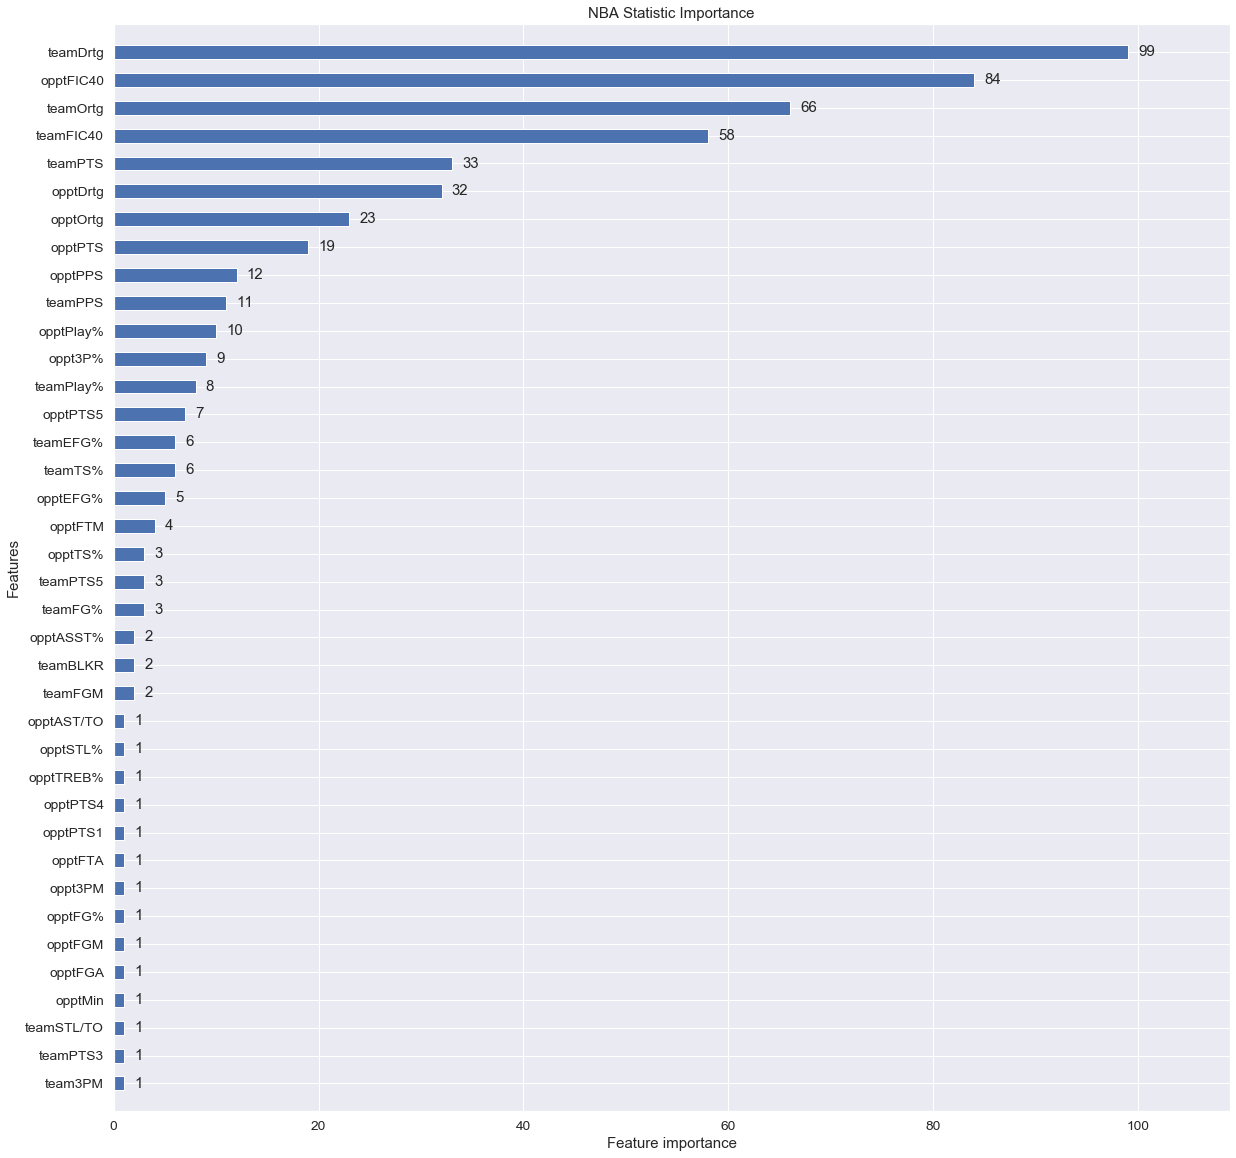

In [567]:
model1 = lgbm.train(params, train_set = train_set, num_boost_round=1000,early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

fig =  plt.figure(figsize = (20,20))
axes = fig.add_subplot(111)
lgbm.plot_importance(model1,ax = axes,height = 0.5)
plt.title('NBA Statistic Importance')
plt.show();

### The above gives us a good visual representation of stat importance in relation to winning a game. 

In [568]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

0.8770325203252033
[[0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 ...
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


In [569]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [570]:
print(randomforest.feature_importances_)

[0.         0.0023135  0.00231258 0.00053132 0.00058775 0.00103029
 0.00242641 0.00115424 0.00018089 0.00118425 0.00037271 0.00085186
 0.001577   0.01866898 0.01172862 0.0016191  0.00212518 0.0032986
 0.00149074 0.00261882 0.01385493 0.0089089  0.00361883 0.00131883
 0.01487155 0.00209064 0.00093231 0.01992361 0.00618687 0.00193482
 0.00101353 0.00123278 0.0074923  0.00662191 0.00083001 0.00380998
 0.00203446 0.00252394 0.00034523 0.         0.         0.
 0.01087017 0.00264429 0.03022129 0.00881554 0.001338   0.00200007
 0.00458631 0.00228273 0.00143448 0.00224889 0.03200226 0.08115705
 0.05468364 0.040001   0.04957696 0.00824251 0.00698218 0.00380841
 0.00099539 0.00038402 0.00020331 0.0003616  0.00216886 0.00088888
 0.01397294 0.00453152 0.00443813 0.0018136  0.00252619 0.00323708
 0.00159926 0.00803241 0.03841066 0.00331605 0.00243886 0.00242001
 0.00183502 0.00117516 0.01905216 0.00365377 0.0048544  0.00277814
 0.00178889 0.00775415 0.007633   0.00295581 0.00120035 0.01071887
 0.0

In [571]:
pred = randomforest.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.9065040650406504


In [572]:
gradientboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)

result = gradientboost.score(x_test, y_test)
print(result)

0.967479674796748


In [573]:
x_train.head()

,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,...,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year,month,day,hour,minute
880,0,1,1,34,32,24,22,28,0,1,...,19.0375,2.5000,60.0000,90.7261,90.7261,2016,12,23,7,0
1134,0,1,1,29,28,8,8,20,1,2,...,14.6723,1.6364,63.6364,92.9488,92.5631,2017,1,9,8,0
204,0,3,3,46,42,34,29,23,1,4,...,16.2578,1.1000,25.0000,101.5908,102.0159,2016,11,8,10,0
2182,0,22,22,12,12,36,30,21,0,0,...,12.4262,1.4545,81.8182,99.4766,99.8928,2017,3,26,6,0
318,0,13,13,29,28,30,26,26,0,5,...,22.4417,1.7647,35.2941,98.0105,98.0105,2016,11,16,7,0


### The Gradient Boost Classifier performs the best. 

In [575]:
best_features = ['opptPTS', 'teamDrtg', 'opptFIC40', 'teamOrtg', 'teamFIC40', 'opptDrtg', 'teamPTS', 'opptPTS','opptOrtg', 'opptPTS5', 'teamTS%','opptEFG%', 'teamPPS']

In [584]:
x_new = df_test[best_features]
y_new = df_test[best_features]['teamPTS']
x_new.head()

,opptPTS,teamDrtg,opptFIC40,teamOrtg,teamFIC40,opptDrtg,teamPTS,opptPTS,opptOrtg,opptPTS5,teamTS%,opptEFG%,teamPPS
0,102,101.7143,55.5208,98.7227,62.5519,98.7227,99,102,101.7143,0,0.5000,0.4880,1.1250
1,99,98.7227,62.5519,101.7143,55.5208,101.7143,102,99,98.7227,0,0.5426,0.4545,1.2289
2,121,118.0353,86.2033,119.0108,81.9038,119.0108,122,121,118.0353,0,0.5790,0.6375,1.2577
3,122,119.0108,81.9038,118.0353,86.2033,118.0353,121,122,119.0108,0,0.6779,0.5619,1.5125
4,102,103.0506,70.7113,90.9270,49.4748,90.9270,90,102,103.0506,0,0.5247,0.4740,1.2329


In [589]:
list(y_new.head())

[99, 102, 122, 121, 90]

In [585]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
df.drop(cols_with_missing, axis=1, inplace=True)
df_test.drop(cols_with_missing, axis=1, inplace=True)

np.nan_to_num(x)

array([[ 0.,  0.,  0., ..., 25.,  8.,  0.],
       [ 0.,  0.,  0., ..., 25.,  8.,  0.],
       [ 0.,  1.,  1., ..., 25., 10.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 12., 10., 30.],
       [ 0., 47., 46., ..., 12., 10., 30.],
       [ 0., 47., 46., ..., 12., 10., 30.]])

In [586]:
gradient2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x, y)
gradient2.score(x_new, y_new)

ValueError: Number of features of the model must match the input. Model n_features is 120 and input n_features is 13 

In [537]:
prev_matches = df.loc[(df['teamAbbr'] == list(indexer['teamAbbr']).index(home_team))& (df['opptAbbr'] == list(indexer['teamAbbr']).index(away_team))][best_features]

In [538]:
prev_matches

,opptPTS,teamDrtg,opptFIC40,teamOrtg,teamFIC40,opptDrtg,teamPTS,opptPTS,opptOrtg,opptPTS5,teamTS%,opptEFG%,teamPPS
200,119,115.7120,70.7469,106.9607,59.8326,106.9607,110,119,115.7120,0,0.5272,0.6316,1.1957
1413,109,104.9269,62.6042,124.1796,90.0415,124.1796,129,109,104.9269,0,0.6080,0.5235,1.4022


In [521]:
df['teamAbbr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [530]:
list(indexer['teamAbbr']).index(home_team)

14

In [532]:
print(prev_matches)

      seasTyp  offLNm1  offFNm1  offLNm2  offFNm2  offLNm3  offFNm3  teamAbbr  \
14          0        7        7        7        7        6        6        14   
66          0       23       23       25       25       13        1        14   
101         0       27       19       33       31        8       18        14   
135         0       22       22       23       23       18       16        14   
156         0        3        3       26       26       24       22        14   
...       ...      ...      ...      ...      ...      ...      ...       ...   
2354        0       20       20       20       20        8        8        14   
2368        0       47       46        3        3       13        1        14   
2402        0        5        5       21       43       10       10        14   
2425        0        9        9       34       39       33       28        14   
2438        0        1        1       18       18        8        8        14   

      teamConf  teamDiv  ..

In [539]:
games = [
    {'home_team': 'MIN', 'away_team': 'BOS'},
    {'home_team': 'CLE', 'away_team': 'LAL'},
    {'home_team': 'CHA', 'away_team': 'MIN'},
    {'home_team': 'ORL', 'away_team': 'HOU'},
    {'home_team': 'DET', 'away_team': 'UTA'},
]

for game in games:
    home_team = game['home_team']    
    away_team = game['away_team']
    prev_matches = df.loc[(df['teamAbbr'] == list(indexer['teamAbbr']).index(home_team))& (df['opptAbbr'] == list(indexer['teamAbbr']).index(away_team))][best_features]
    avg = prev_matches.mean()

    avg_prev = [prev_matches.mean().values.tolist()]

    pred = gradientboost.predict(avg_prev)
    prob = gradientboost.predict_proba(avg_prev)

    print(home_team + ' vs ' + away_team)
    print(pred)
    print(prob)

ValueError: Number of features of the model must match the input. Model n_features is 120 and input n_features is 13 

In [450]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
def linear_regression(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    
    # Crucial to any model to accurately reflect errors.
    print('R^2 Score:',round(linreg.score(x, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
 

    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:75])), y_pred[:75], label='Predicted Home Prices')
    sns.lineplot(range(len(y_pred[:75])), y_test[:75], label='Actual Home Prices')
    plt.title('Predicted Games', fontdict={'fontsize': 20}), plt.xlabel('Games'), plt.ylabel('Team Result Score')
    plt.legend(), plt.show()
    return(linreg,y_pred, y_test)

In [451]:

linreg=LinearRegression()
def cross_validation(x, y, cv=15, show_scores=True):
    score = cross_val_score(linreg, x, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(x, y):
    est = sm.OLS(y, x).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: -1.8265171195966243e+20
Mean Absolute Error: 474060902.38828
Root Mean Squared Error: 10684442894.91918
-----------------------------------
Average Predicted Price: -474060901.6417
Average Actual Price: 0.4827


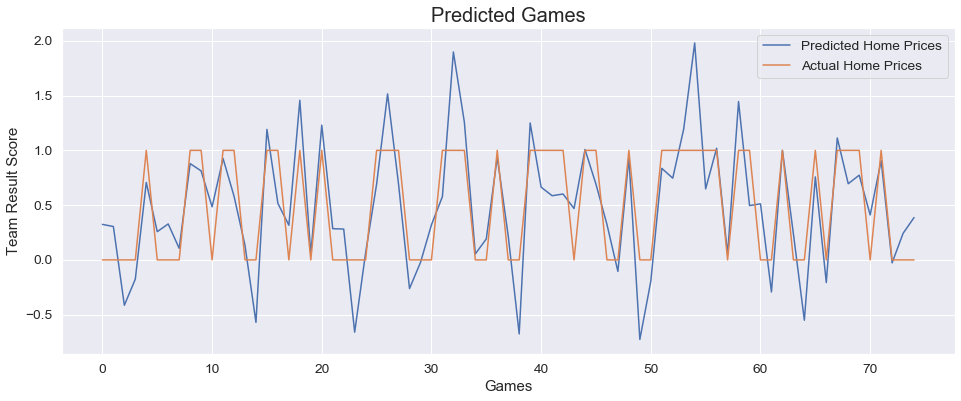

Model Accuracy: 67.0 %
[0.65055579 0.68357784 0.66395909 0.64270561 0.67399244 0.6649197
 0.67750664 0.66098393 0.61398909 0.65837922 0.77208859 0.71483358
 0.64762304 0.69795399 0.62383733]


In [453]:
x
y 
linear_regression(x, y)
cross_validation(x, y, cv=15, show_scores=True)

In [392]:
games = [
    {'home_team': 'MIN', 'away_team': 'BOS'},
    {'home_team': 'CLE', 'away_team': 'LAL'},
    {'home_team': 'CHA', 'away_team': 'MIN'},
    {'home_team': 'ORL', 'away_team': 'HOU'},
    {'home_team': 'DET', 'away_team': 'UTA'},
]

for game in games:
    home_team = game['home_team']    
    away_team = game['away_team']

    prev_matches = df_copy.loc[(df_copy['teamAbbr'] == home_team) & (df_copy['opptAbbr'] == away_team)][best_features]
    avg = prev_matches.mean()

    avg_prev = [prev_matches.mean().values.tolist()]

    pred = model1.predict(avg_prev)
    prob = model1.predict_proba(avg_prev)

    print(home_team + ' vs ' + away_team)
    print(pred)
    print(prob)

LightGBMError: The number of features in data (13) is not the same as it was in training data (120).